In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\navin\\bank-additional-full.csv', delimiter=';', na_values='unknown')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
import numpy as np

In [8]:
#condition to get the null values columns
null = np.where(np.array(df.isnull().sum() !=0))[0]
null

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [9]:
null_col = list(df.columns[null])
null_col

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [10]:
#analysis of the missing values - frequency

In [11]:
col_freq  = []
for i in null:
    col_freq.append(df.iloc[:,i].value_counts())

In [12]:
print(col_freq)

[admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64, married     24928
single      11568
divorced     4612
Name: marital, dtype: int64, university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64, no     32588
yes        3
Name: default, dtype: int64, yes    21576
no     18622
Name: housing, dtype: int64, no     33950
yes     6248
Name: loan, dtype: int64]


In [13]:
#Treatment of missing values

Data Science
CS
Variable
Changes on the same variables
Mistake
Rollback
Whenever we make a significant change in the dataset, we should create a separate copy for that variable
Rollbback is easy and faster


In [14]:
df1 = df[null_col]
df1.head()

,job,marital,education,default,housing,loan
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,NaN,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes


In [15]:
#append null values for visualisation
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
for i in range(len(null_col)):
    col_freq[i] = col_freq[i].append(pd.Series({'null' : df1.isnull().sum()[i]}))

In [17]:
print(col_freq[0])

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
null               330
dtype: int64


In [18]:
#Visualize and saving
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

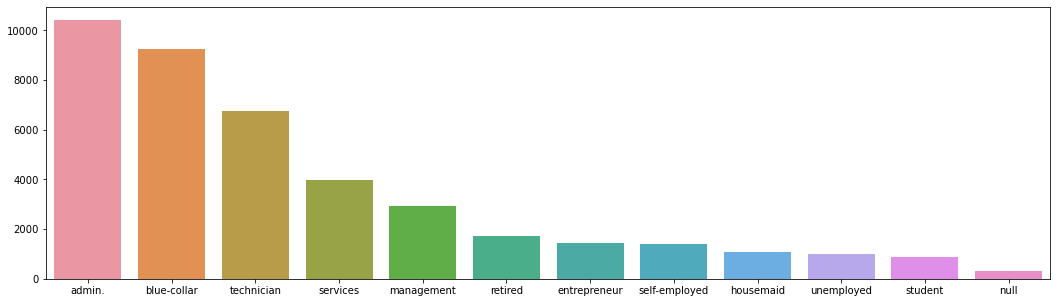

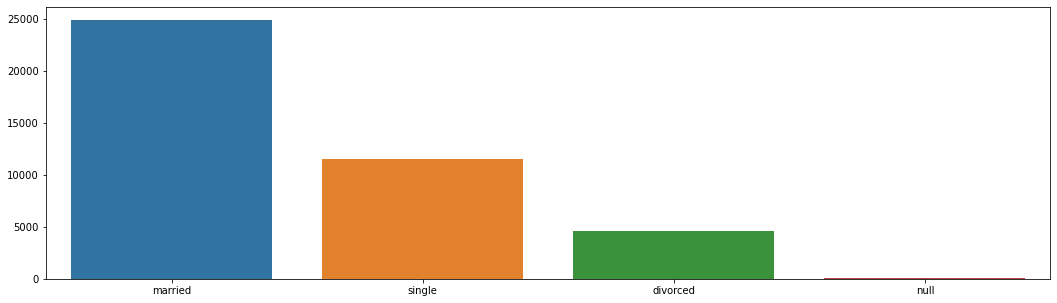

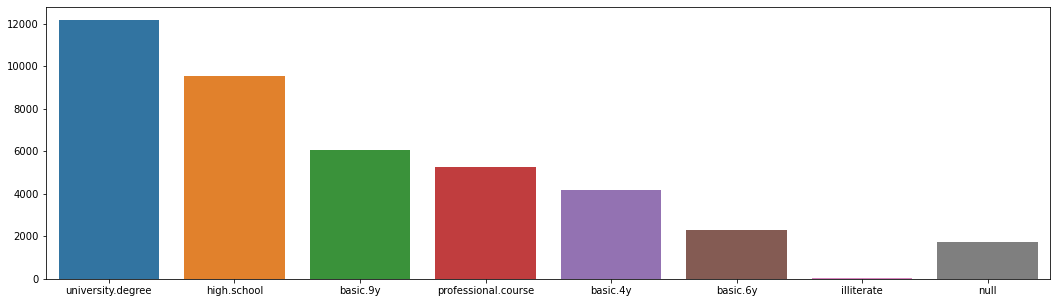

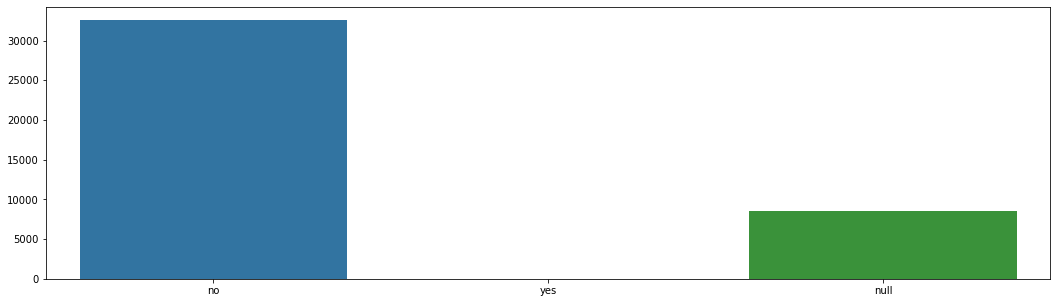

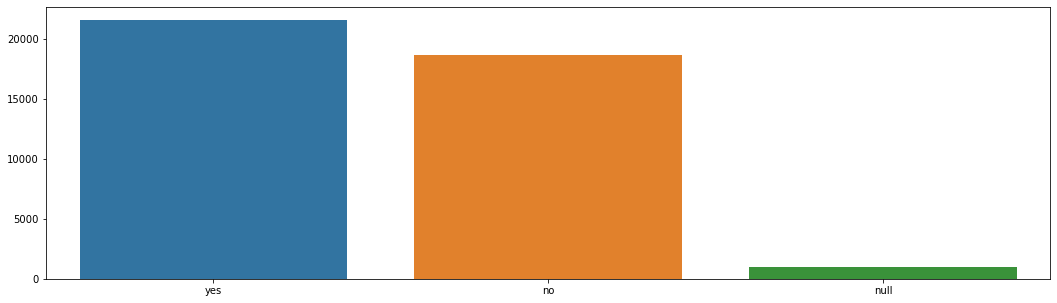

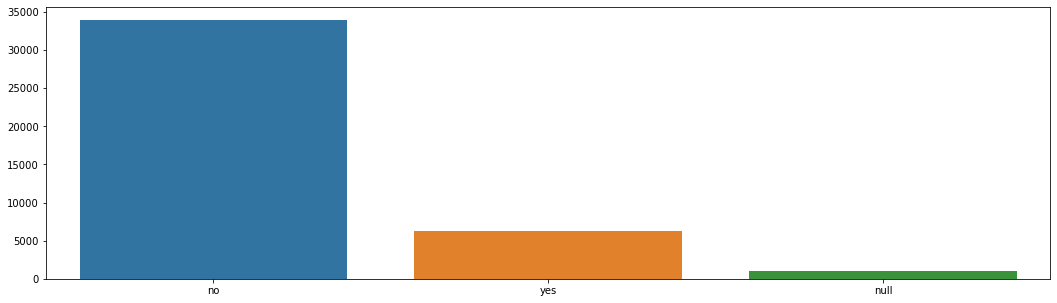

In [19]:
for i in range(len(null_col)):
    plt.figure(figsize=(18,5))
    sns.barplot(col_freq[i].index, col_freq[i].values)
    plt.show()

In [20]:
#remove miss values
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy='most_frequent')

In [21]:
sim.fit(df1)

SimpleImputer(strategy='most_frequent')

In [22]:
df11 = pd.DataFrame(sim.transform(df1))

In [23]:
df11.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [24]:
print("Nan are replaced by : ", sim.statistics_)

Nan are replaced by :  ['admin.' 'married' 'university.degree' 'no' 'yes' 'no']


In [25]:
#Handle categorical values

In [26]:
dfc = df.copy()
dfc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
dfc.isnull().sum().sum()

12718

In [28]:
dfc[null_col] = df11

In [29]:
dfc.isnull().sum().sum()

0

In [30]:
dfc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
dfint = df.select_dtypes(exclude = ['O'])
dfcat = df.select_dtypes(include = ['O'])

In [32]:
#EDA Analysis

In [33]:
#Performing EDA for specifically checking the distributions

In [34]:
leng = dfint.shape[1]
leng

10

In [35]:
coll = list(dfint.columns)
coll

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

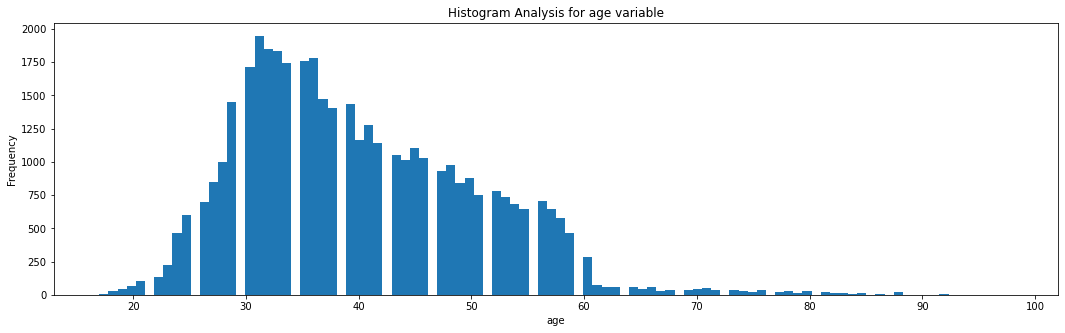

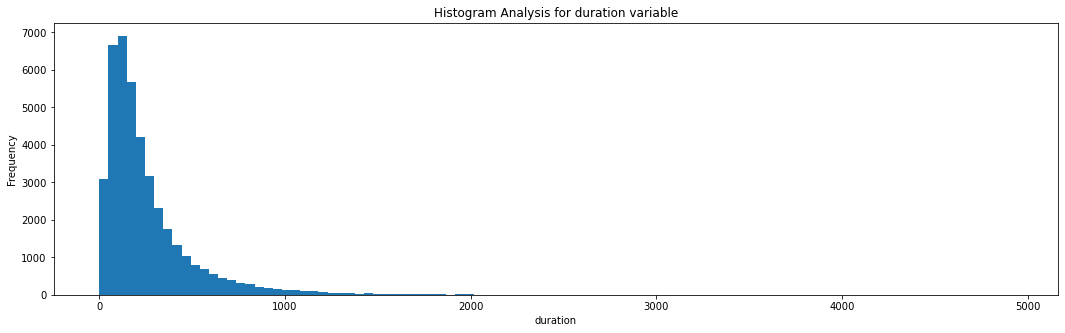

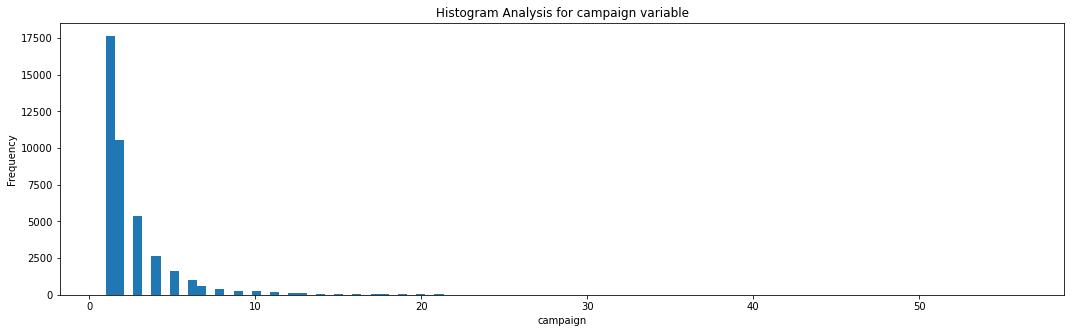

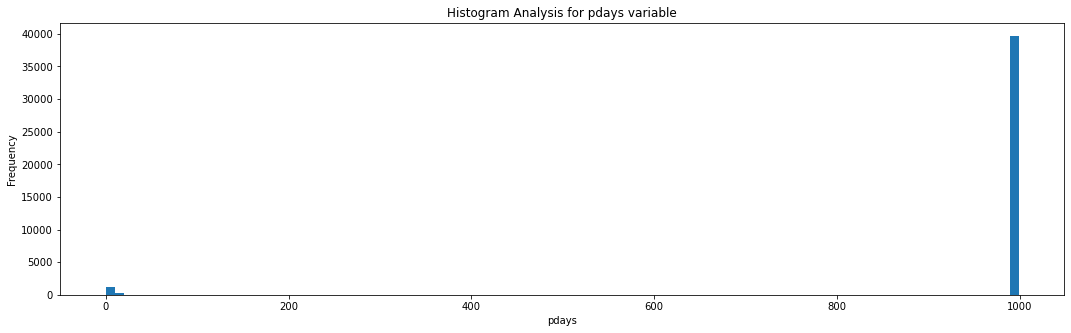

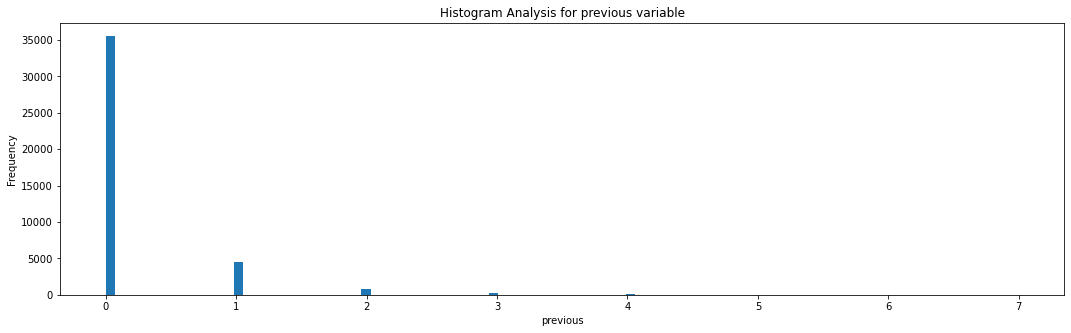

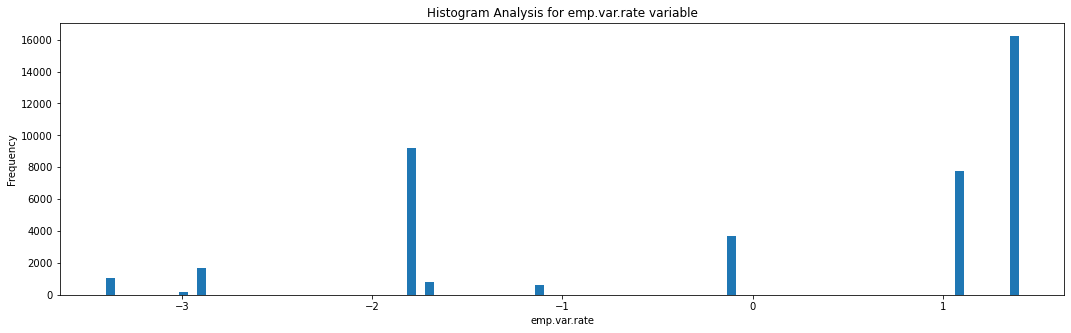

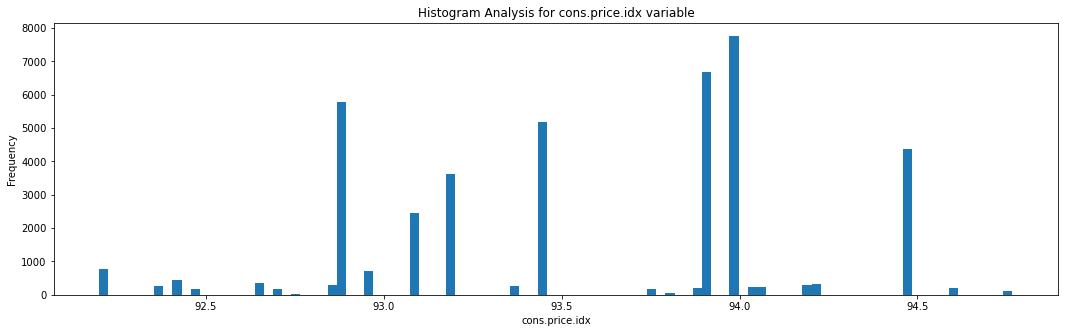

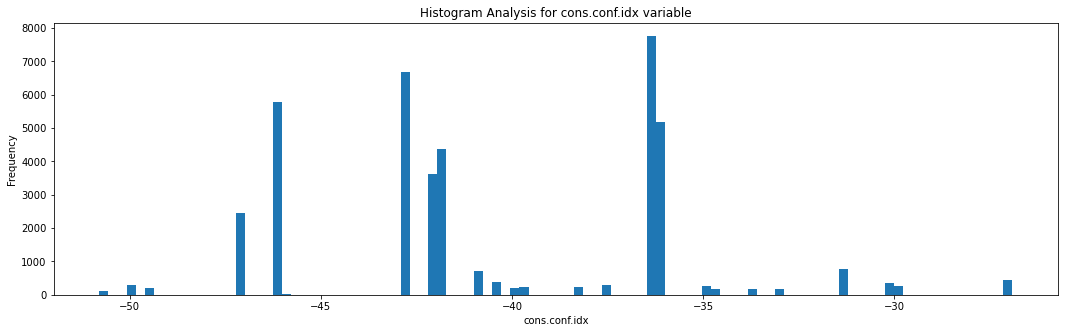

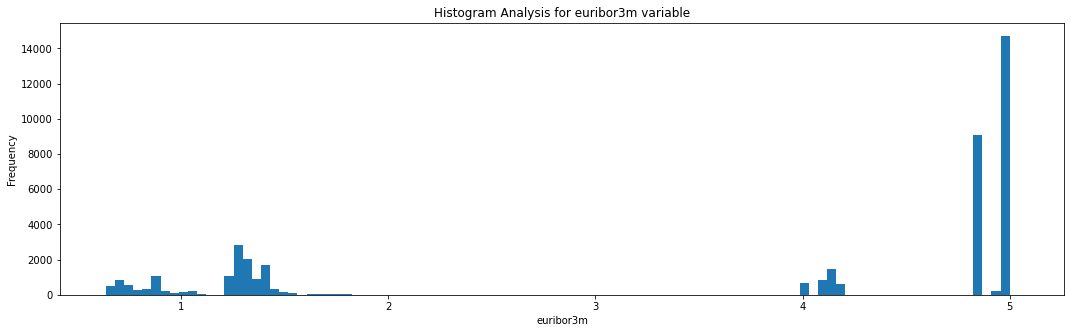

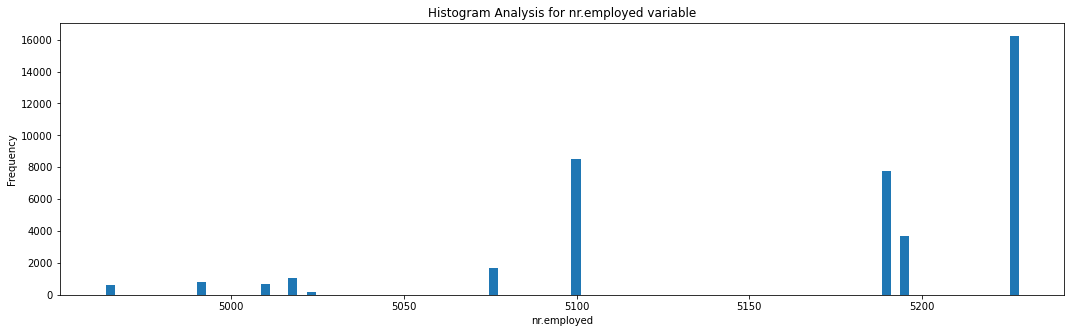

In [36]:
for i in range(leng):
    plt.figure(figsize = (18,5))
    plt.hist(dfint[coll[i]],bins=100)
    plt.xlabel(coll[i])
    plt.ylabel("Frequency")
    plt.title("Histogram Analysis for {} variable".format(coll[i]))
    plt.show()

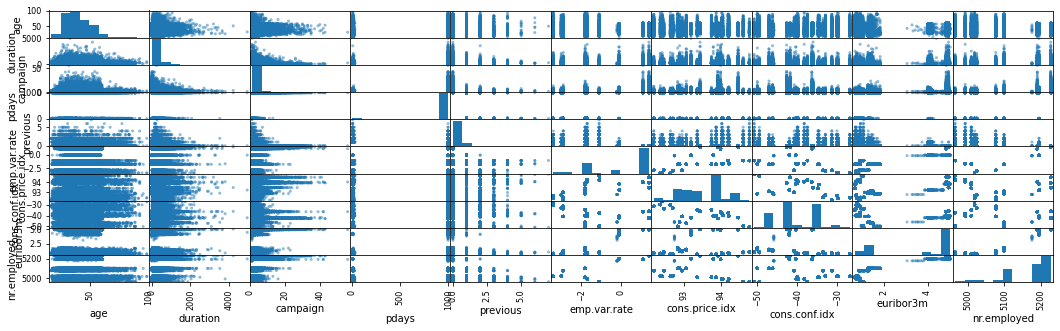

In [37]:
pd.plotting.scatter_matrix(dfc, figsize=(18,5))
plt.show()

In [38]:
corr = dfc.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


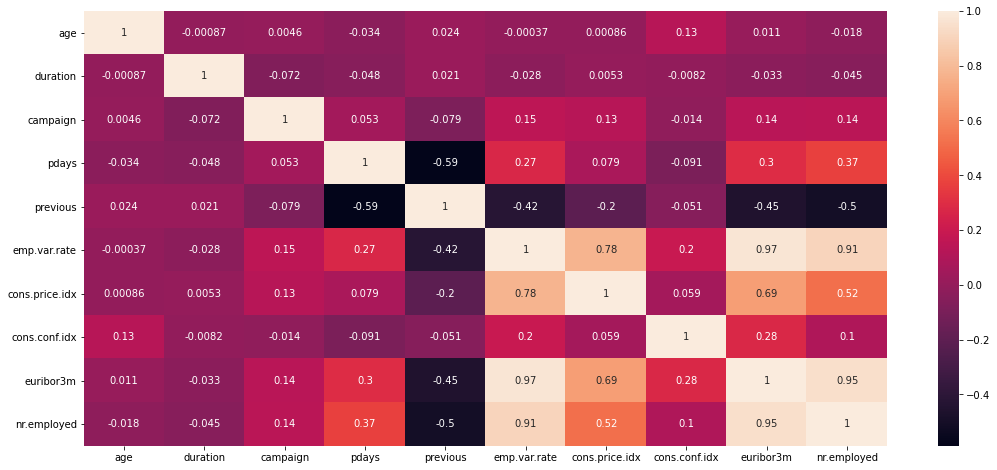

In [39]:
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True)
plt.show()

In [40]:
d2 = dfc.copy()
d2 = d2.drop(['duration', 'pdays'], axis=1)

In [41]:
#Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfint = scaler.fit_transform(dfint)
dfint = pd.DataFrame(dfint)

In [43]:
dfint.head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [44]:
#For the sake of doing one hot encoding we can see the categorical
#columns and we can also read the dataset description and perform
#label encoding for columns approp

In [45]:
dfcat.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no


In [46]:
df_du = pd.get_dummies(dfcat)
df_du.head(2)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [47]:
#Prepare the final dataset

In [48]:
dffin = pd.concat([dfint, df_du], axis=1)

In [49]:
dffin.head(2)

,0,1,2,3,4,5,6,7,8,9,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,1,0,0,0,0,1,0,1,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,1,0,0,0,0,1,0,1,0


In [50]:
x = dffin.iloc[:,:-2].values
y = dffin.iloc[:,-2:].values
y = np.argmax(y, axis=1)

In [51]:
x,y

(array([[ 1.53303429,  0.01047142, -0.56592197, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.62899323, -0.42150051, -0.56592197, ...,  0.        ,
          1.        ,  0.        ],
        [-0.29018564, -0.12451981, -0.56592197, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 1.53303429, -0.26722482, -0.20490853, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.38152696,  0.70856893, -0.56592197, ...,  0.        ,
          1.        ,  0.        ],
        [ 3.26029527, -0.07438021,  0.15610492, ...,  1.        ,
          0.        ,  0.        ]]),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

In [52]:
#Experiment with all the popular algorithms

In [53]:
from sklearn.model_selection import train_test_split as ts

In [54]:
xtrain,xtest,ytrain,ytest = ts(x,y, test_size=0.2)

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='saga', max_iter = 1000)
log_reg.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000, solver='saga')

In [56]:
log_reg.score(xtrain, ytrain)

0.9124430955993931

In [57]:
#Solvers : for small datasets = libliner is okay
#For large we need saga is needed

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, xtrain, ytrain, cv=5)

array([0.91198786, 0.90743551, 0.91229135, 0.91062215, 0.91441578])

In [59]:
#Getting decision scores

In [60]:
from sklearn.model_selection import cross_val_predict
y_logscores = cross_val_predict(log_reg, xtrain, ytrain, cv=3, method = 'decision_function')

In [61]:
y_logpred = cross_val_predict(log_reg, xtrain,ytrain, cv=3)

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

In [63]:
precision_score(ytrain,y_logpred)

0.6704545454545454

In [64]:
recall_score(ytrain,y_logpred)

0.4289176090468498

In [65]:

f1_score(ytrain,y_logpred)

0.5231527093596059

In [68]:
import scikitplot as skplt

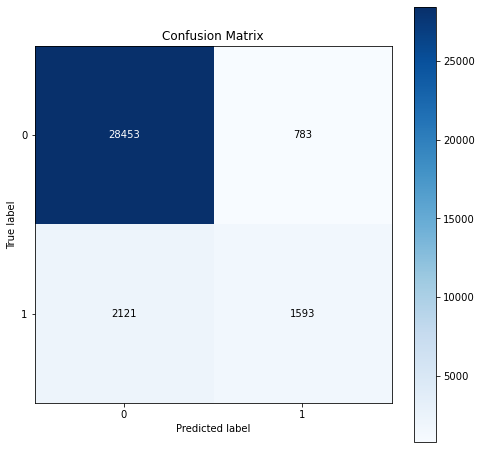

In [69]:
skplt.metrics.plot_confusion_matrix(ytrain,y_logpred, figsize=(8,8))
plt.show()

In [70]:
precision, recall, threshold = precision_recall_curve(ytrain,y_logscores)

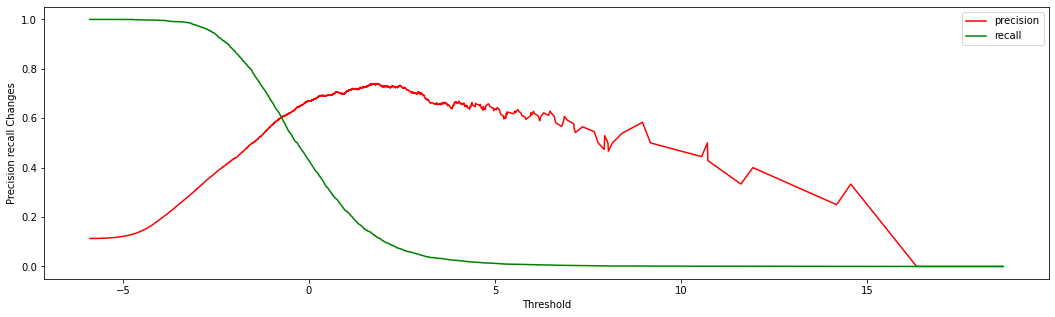

In [71]:
plt.figure(figsize=(18,5))
plt.plot(threshold, precision[:-1], c='r', label='precision')
plt.plot(threshold, recall[:-1], c='g', label='recall')
plt.xlabel("Threshold")
plt.ylabel("Precision recall Changes")
plt.legend()
plt.show()

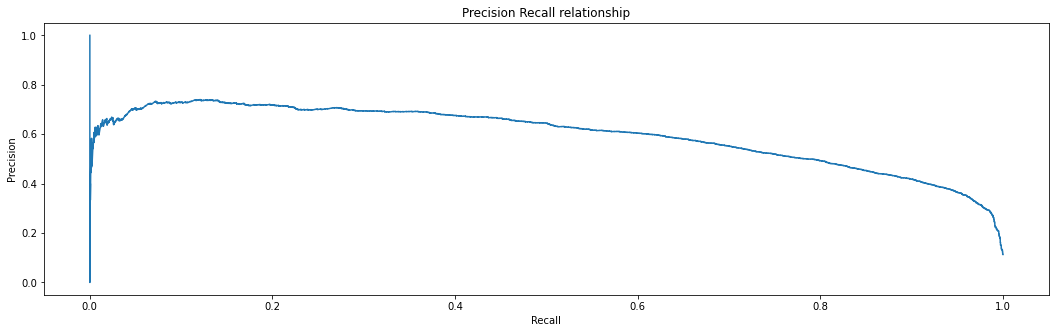

In [72]:
plt.figure(figsize=(18,5))
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall relationship")
plt.show()

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

In [76]:
fpr, tpr, th = roc_curve(ytrain, y_logscores)


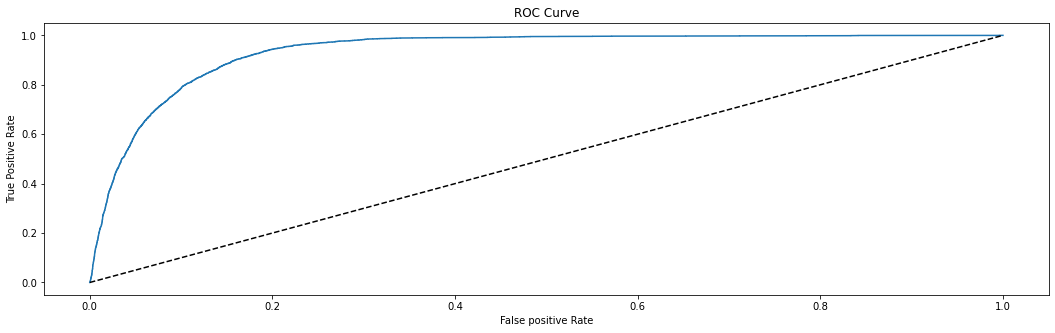

In [77]:
plt.figure(figsize=(18,5))
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [79]:
roc_auc_score(ytrain,y_logscores)

0.9352828794591069

In [ ]:
#This is Logistic Regression Completely.

In [ ]:
#Random Forest Classifier (More than 40000 rows we cannot use KNN algorithm)

In [ ]:
#random forrest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [84]:
rf.score(xtrain,ytrain)

0.9999696509863429

In [85]:
rf.score(xtest,ytest)

0.9150279193979121

In [86]:
cross_val_score(rf,xtrain,ytrain, cv=5)

array([0.91320182, 0.90864947, 0.91471927, 0.91320182, 0.91335357])

In [91]:
yproba = cross_val_predict(rf, xtrain,ytrain, cv=5, method ='predict_proba')
yproba

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.67, 0.33],
       ...,
       [1.  , 0.  ],
       [0.77, 0.23],
       [1.  , 0.  ]])

In [90]:
yscore_forest = yproba[:,1]
yscore_forest

array([0.  , 0.  , 0.39, ..., 0.  , 0.23, 0.  ])

In [98]:
yrf_pred = cross_val_predict(rf,xtrain,ytrain, cv=3)
yrf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
precision_score(ytrain,yrf_pred)
recall_score(ytrain,yrf_pred)
f1_score(ytrain,yrf_pred)

0.5261115602263541

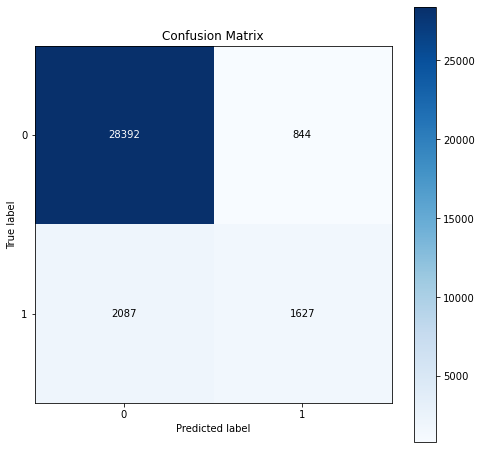

In [100]:
skplt.metrics.plot_confusion_matrix(ytrain,yrf_pred, figsize=(8,8))
plt.show()

In [101]:
precision, recall, threshold = precision_recall_curve(ytrain,yscore_forest)

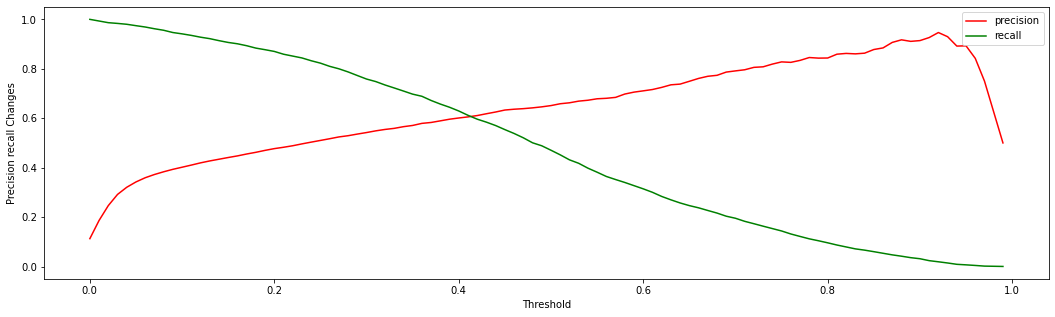

In [102]:
plt.figure(figsize=(18,5))
plt.plot(threshold, precision[:-1], c='r', label='precision')
plt.plot(threshold, recall[:-1], c='g', label='recall')
plt.xlabel("Threshold")
plt.ylabel("Precision recall Changes")
plt.legend()
plt.show()

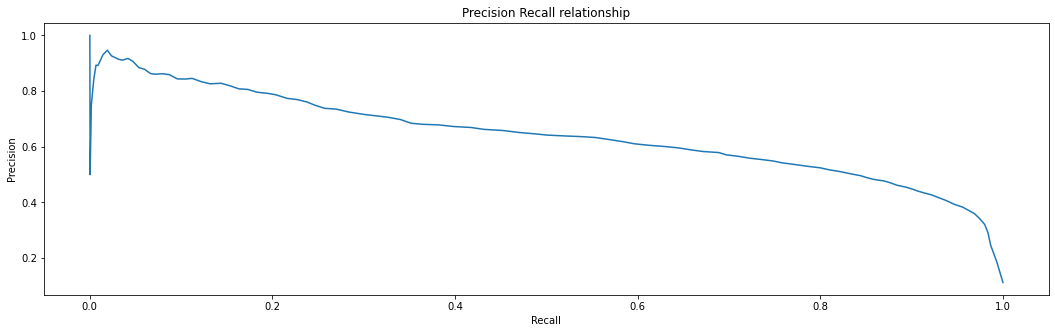

In [103]:
plt.figure(figsize=(18,5))
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall relationship")
plt.show()

In [104]:
fpr_f, tpr_f, th_f = roc_curve(ytrain, yscore_forest)


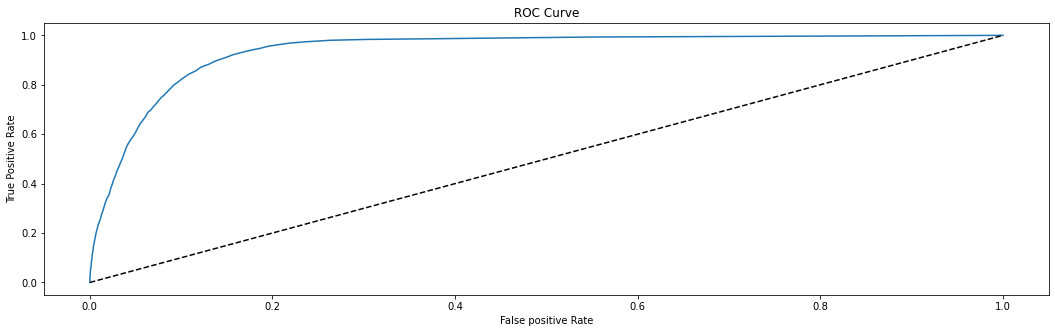

In [105]:
plt.figure(figsize=(18,5))
plt.plot(fpr_f,tpr_f)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [108]:
roc_auc_score(ytrain,yscore_forest)

0.9393376441199035

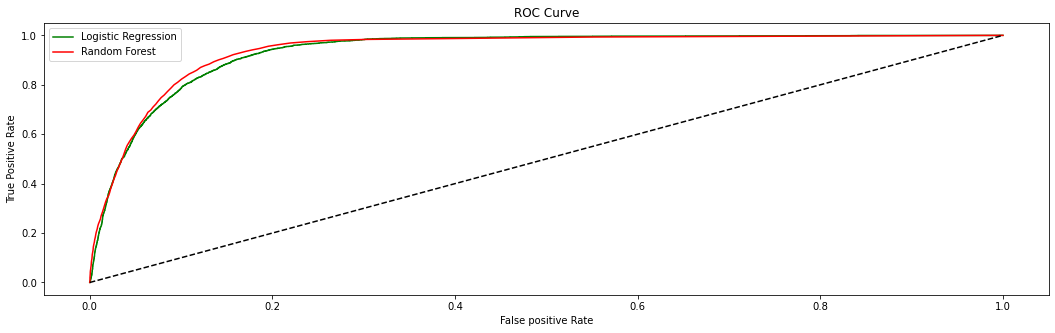

In [110]:
#Compare LR and RF
plt.figure(figsize=(18,5))
plt.plot(fpr,tpr, c='g', label="Logistic Regression")
plt.plot(fpr_f,tpr_f, c='r', label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()